<a href="https://colab.research.google.com/github/whaudrms/path_planning/blob/main/Track_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

def track_show(npy_name, index_interval = 5, index_fontsize=10):
    # npy_folder_path = "deepracer-race-data/raw_data/tracks/npy"
    # numpy_file_path = os.path.join(npy_folder_path, npy_name)
    track_data = np.load(npy_name, allow_pickle=True) # Load the numpy array

    # Check if the loaded data is a dictionary and extract if necessary
    if isinstance(track_data, dict):
        track_arr = track_data['data'] # Assuming 'data' key holds the array
    else:
        track_arr = track_data # Assume the array is loaded directly

    # Get track waypoints
    track_C = track_arr[:,[0,1]]  # Center coordinate of the track
    track_L = track_arr[:,[2,3]]  # Left coordinate of the track
    track_R = track_arr[:,[4,5]]  # Right coordinate of the track

    # Visualization
    w = track_C[:,0].max() - track_C[:,0].min()
    h = track_C[:,1].max() - track_C[:,1].min()
    plt.figure(figsize = (10, 10 * (h/w)))
    plt.scatter(track_C[:,0],track_C[:,1], s = 15)
    plt.plot(track_L[:,0],track_L[:,1], c='red')
    plt.plot(track_R[:,0],track_R[:,1], c='blue')

    # Show indices
    for i, (x, y) in enumerate(track_C) :
        if i % index_interval == 0 :
            plt.text(x+0.1, y, i, fontsize=index_fontsize)

    # Output
    plt.title(npy_name)
    plt.show()

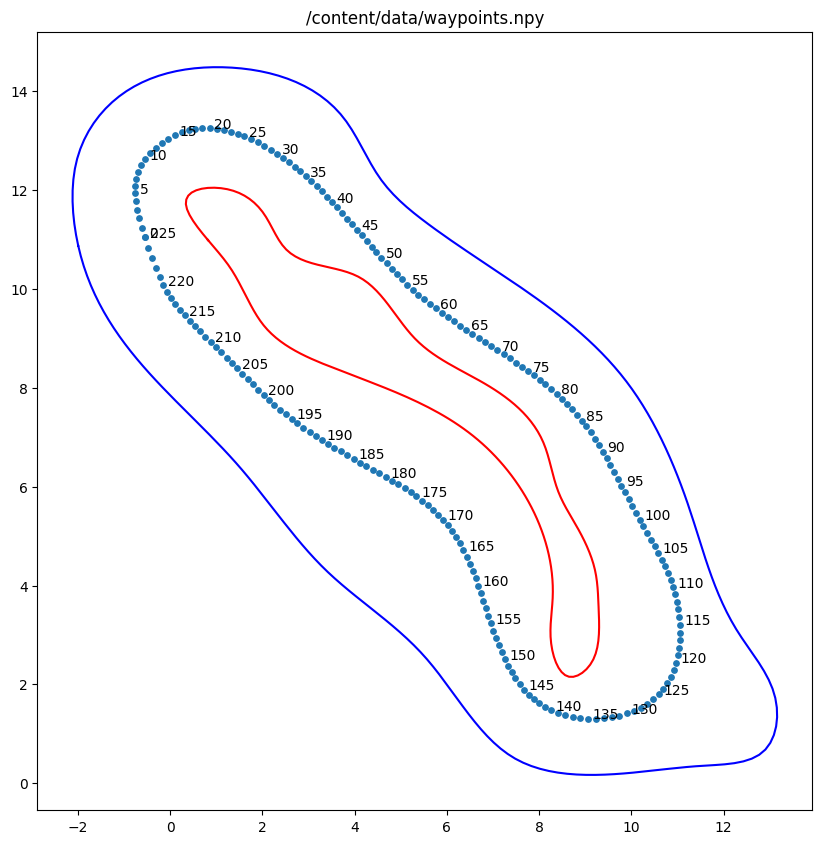

In [13]:
track_show(
    npy_name = "/content/data/waypoints.npy",   # Name of the numpy file containing the track waypoints
    index_interval = 5,     # Interval between the indices of the waypoints
    index_fontsize = 10,    # Font size of the waypoint indices
)